In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [ ]:
from google.colab import files
files=files.upload()

Saving AEP_hourly.csv to AEP_hourly.csv


In [ ]:
df = pd.read_csv("AEP_hourly.csv")
print("First Five Rows ","\n")
print(df.head(5),"\n")
print(df.tail(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0 

                   Datetime   AEP_MW
121268  2018-01-01 20:00:00  21089.0
121269  2018-01-01 21:00:00  20999.0
121270  2018-01-01 22:00:00  20820.0
121271  2018-01-01 23:00:00  20415.0
121272  2018-01-02 00:00:00  19993.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 



In [ ]:
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



In [ ]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday


In [ ]:
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Year')

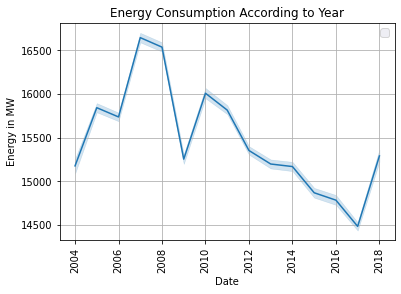

In [ ]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

No handles with labels found to put in legend.


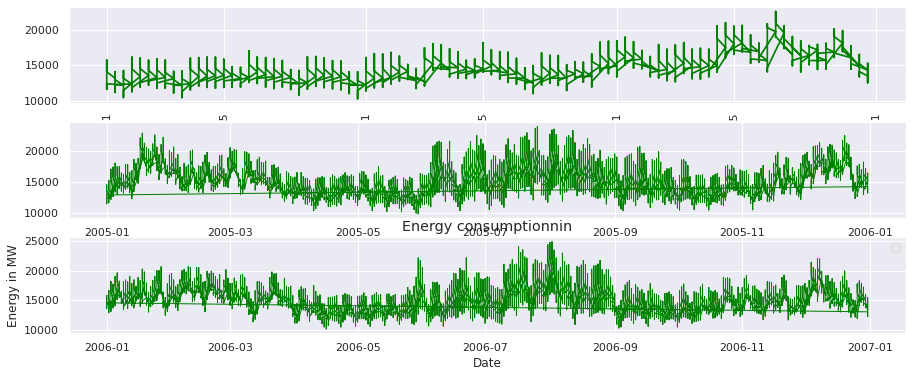

In [ ]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')


y_2004 = dataset.loc[dataset["Year"] == 2004]["AEP_MW"].to_list()
x_2004 = dataset.loc[dataset["Year"] == 2004]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)


y_2005 = dataset.loc[dataset["Year"] == 2005]["AEP_MW"].to_list()
x_2005 = dataset.loc[dataset["Year"] == 2005]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)


y_2006 = dataset.loc[dataset["Year"] == 2006]["AEP_MW"].to_list()
x_2006 = dataset.loc[dataset["Year"] == 2006]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Energy Distribution')

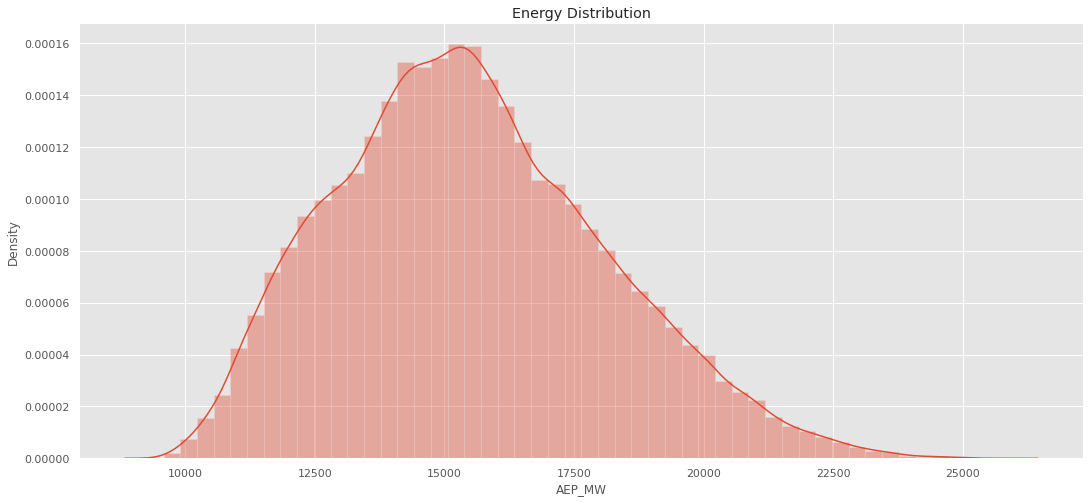

In [ ]:
sns.distplot(dataset["AEP_MW"])
plt.title("Energy Distribution")

No handles with labels found to put in legend.


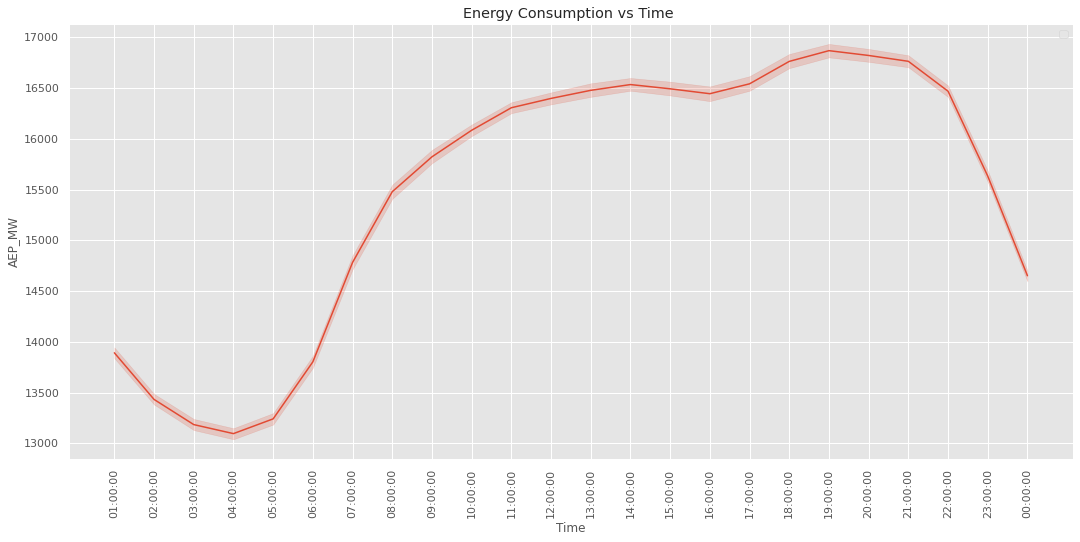

In [ ]:
fig = plt.figure()
ax1= fig.add_subplot(111)

dataset["Time"] = dataset["Time"].astype(str)
sns.lineplot(x=dataset["Time"],y=dataset["AEP_MW"], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [ ]:
NewDataSet = dataset.resample('D').mean()

In [ ]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 7)
New  Dataset  (5055, 4)


In [ ]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [ ]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
print(Training_Set)
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

                  AEP_MW
Datetime                
2004-10-01  14284.521739
2004-10-02  12999.875000
2004-10-03  12227.083333
2004-10-04  14309.041667
2004-10-05  14439.708333
...                  ...
2018-05-31  16741.083333
2018-06-01  15734.666667
2018-06-02  14212.166667
2018-06-03  13824.625000
2018-06-04  14127.500000

[4995 rows x 1 columns]


In [ ]:
X_Train = []
Y_Train = []
 
for i in range(60, Train.shape[0]):
  
    X_Train.append(Train[i-60:i])
    
    Y_Train.append(Train[i])

X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [ ]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

Model

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense,LSTM
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
history = regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32, validation_split = 0.1)

Epoch 1/50
139/139 [==============================] - 23s 124ms/step - loss: 0.0254 - val_loss: 0.0209
Epoch 2/50
139/139 [==============================] - 16s 112ms/step - loss: 0.0188 - val_loss: 0.0182
Epoch 3/50
139/139 [==============================] - 16s 113ms/step - loss: 0.0173 - val_loss: 0.0155
Epoch 4/50
139/139 [==============================] - 16s 113ms/step - loss: 0.0166 - val_loss: 0.0143
Epoch 5/50
139/139 [==============================] - 16s 114ms/step - loss: 0.0165 - val_loss: 0.0139
Epoch 6/50
139/139 [==============================] - 16s 113ms/step - loss: 0.0155 - val_loss: 0.0135
Epoch 7/50
139/139 [==============================] - 16s 113ms/step - loss: 0.0156 - val_loss: 0.0132
Epoch 8/50
139/139 [==============================] - 16s 113ms/step - loss: 0.0156 - val_loss: 0.0129
Epoch 9/50
139/139 [==============================] - 16s 113ms/step - loss: 0.0149 - val_loss: 0.0122
Epoch 10/50
139/139 [==============================] - 16s 113ms/step - l

**Test Data**


In [ ]:
TestData.head(2)

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4,2018,17
2018-04-27,12964.000000,4,2018,17


In [ ]:
TestData.shape

(100, 4)

In [ ]:
NewDataSet.shape

(5055, 4)

In [ ]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [ ]:
Df_Total.shape

(5155, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [ ]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

**Future Predicted**

In [ ]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,13380.753906
1,2018-04-27,12964.000000,12967.841797
2,2018-04-28,12237.583333,14574.149414
3,2018-04-29,12156.791667,12498.009766
4,2018-04-30,13443.500000,12427.015625
...,...,...,...
95,2018-07-30,15368.083333,15244.144531
96,2018-07-31,15180.291667,15407.597656
97,2018-08-01,15151.166667,14450.054688
98,2018-08-02,15687.666667,15237.343750


In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

No handles with labels found to put in legend.


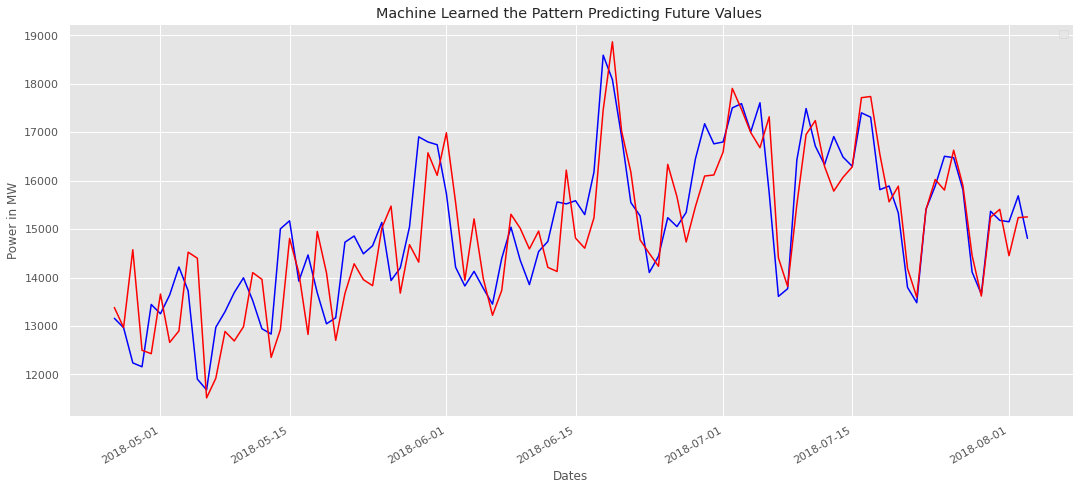

In [ ]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="blue")
plt.plot(x,y1, color="red")
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()